# NBA: Prediction of Game Winners

NBA is the second most popular sport in North America. Being able to predict game result is important for general managers of each team especially closer to the end of a season. They can use that to decide if they have a shot to the playoffs or if they can rest their star players to avoid them getting injured. And for teams that are making it to playoffs, it's very important for them to predict game results to see which seeds they are likely to be. Also, NBA attracts many people to bet on the game so the sport betting market is quite huge. Therefore, it's interesting to know if we can find a way to **beat the house.**

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure

In [2]:
# Load traditional game data, the data is derived from the following url
# https://www.nba.com/stats/teams/boxscores/?Season=2019-20&SeasonType=Regular%20Season&sort=gdate&dir=-1

NBA_traditional_df = pd.read_excel('./datasets2/traditional.xlsx', sheet_name = '2019_2020')
NBA_traditional_df.columns.values[1:3] = ['MATCH_UP','GAME_DATE']
NBA_traditional_df.drop('MIN', axis=1, inplace= True)
NBA_traditional_df.head()

,TEAM,MATCH_UP,GAME_DATE,W/L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,TOR,TOR vs. NOP,2019-10-22,W,130,42,103,40.8,14,40,35.0,32,38,84.2,16,41,57,23,7,3,17,24,8
1,NOP,NOP @ TOR,2019-10-22,L,122,43,102,42.2,19,45,42.2,17,20,85.0,16,37,53,30,4,9,19,34,-8
2,LAL,LAL @ LAC,2019-10-22,L,102,37,85,43.5,13,33,39.4,15,21,71.4,9,32,41,20,4,7,15,24,-10
3,LAC,LAC vs. LAL,2019-10-22,W,112,42,81,51.9,11,31,35.5,17,24,70.8,11,34,45,24,8,5,14,25,10
4,WAS,WAS @ DAL,2019-10-23,L,100,37,93,39.8,11,41,26.8,15,18,83.3,11,36,47,26,6,3,17,32,-8


In [3]:
# Load advanced data game data, the data is derived from the following url
# https://www.nba.com/stats/teams/boxscores-advanced/?Season=2019-20&SeasonType=Regular%20Season&sort=gdate&dir=-1

NBA_advanced_df = pd.read_excel('./datasets2/advanced.xlsx', sheet_name = '2019_2020')
NBA_advanced_df.columns.values[1:3] = ['MATCH_UP','GAME_DATE']
NBA_advanced_df.columns.values[10] = 'AST_RATIO'
NBA_advanced_df.head()

,TEAM,MATCH_UP,GAME_DATE,W/L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST_RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,TOR,TOR vs. NOP,2019-10-22,W,53,113.0,108.9,4.1,54.8,1.35,14.2,40.0,72.9,55.6,14.8,47.6,54.3,102.79,53.1
1,LAC,LAC vs. LAL,2019-10-22,W,48,115.5,105.2,10.3,57.1,1.71,18.2,25.6,72.0,50.5,14.4,58.6,61.2,97.00,58.0
2,NOP,NOP @ TOR,2019-10-22,L,53,108.9,113.0,-4.1,69.8,1.58,19.0,27.1,60.0,44.4,17.0,51.5,55.1,102.79,46.9
3,LAL,LAL @ LAC,2019-10-22,L,48,105.2,115.5,-10.3,54.1,1.33,15.3,28.0,74.4,49.5,15.5,51.2,54.1,97.00,42.0
4,SAC,SAC @ PHX,2019-10-23,L,48,88.0,112.7,-24.8,50.0,0.63,12.0,28.8,74.0,49.5,25.0,44.8,48.3,109.00,28.2


In [4]:
# Creating a dataframe only showing if home team won the game

NBA_result = copy.deepcopy(NBA_advanced_df[['TEAM','MATCH_UP','GAME_DATE','W/L']])
NBA_result['Home'] = np.where(NBA_result['MATCH_UP'].str.slice(4,5) == 'v', \
                              NBA_result['MATCH_UP'].str[:3], \
                              NBA_result['MATCH_UP'].str[-3:])
NBA_result['Visitor'] = np.where(NBA_result['MATCH_UP'].str.slice(4,5) == '@', \
                              NBA_result['MATCH_UP'].str[:3], \
                              NBA_result['MATCH_UP'].str[-3:])
NBA_result['Home_Win'] = np.where( ((NBA_result['Home'] == NBA_result['TEAM']) & (NBA_result['W/L'] == 'W'))| \
                                   ((NBA_result['Visitor'] == NBA_result['TEAM']) & (NBA_result['W/L'] == 'L')) \
                                   ,1,0)
NBA_result['Team_Game'] = NBA_result.groupby('TEAM')['GAME_DATE'].rank(ascending = True)
NBA_result.tail(5)

,TEAM,MATCH_UP,GAME_DATE,W/L,Home,Visitor,Home_Win,Team_Game
2113,IND,IND vs. MIA,2020-08-14,W,IND,MIA,1,73.0
2114,OKC,OKC @ LAC,2020-08-14,L,LAC,OKC,1,72.0
2115,PHI,PHI @ HOU,2020-08-14,W,HOU,PHI,0,73.0
2116,MIA,MIA @ IND,2020-08-14,L,IND,MIA,1,73.0
2117,LAC,LAC vs. OKC,2020-08-14,W,LAC,OKC,1,72.0


In [5]:
# Droping extra columns and duplicate rows

NBA_result_df = copy.deepcopy(NBA_result.iloc[:,:-1])
NBA_result_df.drop(['TEAM','MATCH_UP', 'W/L'], axis=1, inplace = True)
NBA_result_df.drop_duplicates(inplace = True, ignore_index = True)
NBA_result_df

,GAME_DATE,Home,Visitor,Home_Win
0,2019-10-22,TOR,NOP,1
1,2019-10-22,LAC,LAL,1
2,2019-10-23,PHX,SAC,1
3,2019-10-23,MIA,MEM,1
4,2019-10-23,ORL,CLE,1
...,...,...,...,...
1054,2020-08-13,BKN,POR,0
1055,2020-08-14,TOR,DEN,1
1056,2020-08-14,HOU,PHI,0
1057,2020-08-14,IND,MIA,1


In [6]:
# Join dataframes to get each team's game number

NBA_result_df = pd.merge(NBA_result_df, NBA_result[['GAME_DATE','TEAM', 'Team_Game']], how='left', 
                         left_on=['GAME_DATE','Home'], right_on=['GAME_DATE','TEAM'])
NBA_result_df.drop('TEAM', axis=1, inplace = True)
NBA_result_df = pd.merge(NBA_result_df, NBA_result[['GAME_DATE','TEAM', 'Team_Game']], how='left', 
                         left_on=['GAME_DATE','Visitor'], right_on=['GAME_DATE','TEAM'])
NBA_result_df.drop('TEAM', axis=1, inplace = True)
NBA_result_df.columns= ['GAME_DATE', 'Home', 'Visitor', 'Home_Win', 'Home_Team_Game#' , 'Visitor_Team_Game#']
NBA_result_df = NBA_result_df.astype({'Home_Team_Game#':int , 'Visitor_Team_Game#':int})
NBA_result_df

,GAME_DATE,Home,Visitor,Home_Win,Home_Team_Game#,Visitor_Team_Game#
0,2019-10-22,TOR,NOP,1,1,1
1,2019-10-22,LAC,LAL,1,1,1
2,2019-10-23,PHX,SAC,1,1,1
3,2019-10-23,MIA,MEM,1,1,1
4,2019-10-23,ORL,CLE,1,1,1
...,...,...,...,...,...,...
1054,2020-08-13,BKN,POR,0,72,74
1055,2020-08-14,TOR,DEN,1,72,73
1056,2020-08-14,HOU,PHI,0,72,73
1057,2020-08-14,IND,MIA,1,73,73


In [7]:
# Looking at DAL last few games to verify 

NBA_result_df[(NBA_result_df['Visitor']=='DAL')|(NBA_result_df['Home']=='DAL')].tail(5)

,GAME_DATE,Home,Visitor,Home_Win,Home_Team_Game#,Visitor_Team_Game#
1013,2020-08-06,DAL,LAC,0,71,68
1022,2020-08-08,DAL,MIL,1,72,70
1032,2020-08-10,UTA,DAL,0,71,73
1038,2020-08-11,DAL,POR,0,74,73
1050,2020-08-13,PHX,DAL,1,73,75


In [8]:
# Glossory:

# OFFERG: Name Offensive RatingDefinition Measures a team's points scored per 100 possessions. 
# DFFRTG: The number of points allowed per 100 possessions by a team.
# NETRTG: Measures a team's point differential per 100 possessions.
# AST%:   The percentage of teammate field goals a player assisted on while they were on the floor.
# AST_Ratio: Assist Ratio is the number of assists a player averages per 100 possessions used.
# OREB%:  The percentage of available offensive rebounds a player or team obtains while on the floor
# DREB%:  The percentage of available defensive rebounds a player or team obtains while on the floor.
# REB%:   The percentage of available rebounds a player or team grabbed while on the floor.
# TOV%:   Percentage of plays that end in a player or team's turnover.
# EFTG%:  Measures field goal percentage adjusting for made 3-point field goals being 1.5 times more valuable than 
#         made 2-point field goals.
# TS%:    A shooting percentage that factors in the value of three-point field goals and free throws in addition to 
#         conventional two-point field goals
# PACE:   The number of possessions per 48 minutes for a team or player.
# PIE:    PIE measures a player's overall statistical contribution against the total statistics in games they play in. 
#         PIE yields results which are comparable to other advanced statistics (e.g. PER) using a simple formula.

In [9]:
# Combine df

NBA_df = NBA_traditional_df.merge(NBA_advanced_df, how = 'inner', 
                                  on = ['TEAM','MATCH_UP','GAME_DATE','W/L'], validate = "1:1")
NBA_df.head()

,TEAM,MATCH_UP,GAME_DATE,W/L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST_RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,TOR,TOR vs. NOP,2019-10-22,W,130,42,103,40.8,14,40,35.0,32,38,84.2,16,41,57,23,7,3,17,24,8,53,113.0,108.9,4.1,54.8,1.35,14.2,40.0,72.9,55.6,14.8,47.6,54.3,102.79,53.1
1,NOP,NOP @ TOR,2019-10-22,L,122,43,102,42.2,19,45,42.2,17,20,85.0,16,37,53,30,4,9,19,34,-8,53,108.9,113.0,-4.1,69.8,1.58,19.0,27.1,60.0,44.4,17.0,51.5,55.1,102.79,46.9
2,LAL,LAL @ LAC,2019-10-22,L,102,37,85,43.5,13,33,39.4,15,21,71.4,9,32,41,20,4,7,15,24,-10,48,105.2,115.5,-10.3,54.1,1.33,15.3,28.0,74.4,49.5,15.5,51.2,54.1,97.00,42.0
3,LAC,LAC vs. LAL,2019-10-22,W,112,42,81,51.9,11,31,35.5,17,24,70.8,11,34,45,24,8,5,14,25,10,48,115.5,105.2,10.3,57.1,1.71,18.2,25.6,72.0,50.5,14.4,58.6,61.2,97.00,58.0
4,WAS,WAS @ DAL,2019-10-23,L,100,37,93,39.8,11,41,26.8,15,18,83.3,11,36,47,26,6,3,17,32,-8,48,96.2,103.8,-7.7,70.3,1.53,17.9,25.9,81.8,50.0,16.3,45.7,49.5,104.00,43.2


In [10]:
print(NBA_advanced_df.shape, NBA_traditional_df.shape,NBA_df.shape)

(2118, 19) (2118, 23) (2118, 38)


In [11]:
# Adding two new featuers: Opponenet and Home/Visitor

NBA_df['Opponent'] = NBA_df['MATCH_UP'].str[-3:]
NBA_df['Home_Game'] = NBA_df['MATCH_UP'].str.slice(4,5).replace('v', 1).replace('@', 0)
NBA_df.drop('MIN', axis =1)
NBA_df.head()

,TEAM,MATCH_UP,GAME_DATE,W/L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST_RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,Opponent,Home_Game
0,TOR,TOR vs. NOP,2019-10-22,W,130,42,103,40.8,14,40,35.0,32,38,84.2,16,41,57,23,7,3,17,24,8,53,113.0,108.9,4.1,54.8,1.35,14.2,40.0,72.9,55.6,14.8,47.6,54.3,102.79,53.1,NOP,1
1,NOP,NOP @ TOR,2019-10-22,L,122,43,102,42.2,19,45,42.2,17,20,85.0,16,37,53,30,4,9,19,34,-8,53,108.9,113.0,-4.1,69.8,1.58,19.0,27.1,60.0,44.4,17.0,51.5,55.1,102.79,46.9,TOR,0
2,LAL,LAL @ LAC,2019-10-22,L,102,37,85,43.5,13,33,39.4,15,21,71.4,9,32,41,20,4,7,15,24,-10,48,105.2,115.5,-10.3,54.1,1.33,15.3,28.0,74.4,49.5,15.5,51.2,54.1,97.00,42.0,LAC,0
3,LAC,LAC vs. LAL,2019-10-22,W,112,42,81,51.9,11,31,35.5,17,24,70.8,11,34,45,24,8,5,14,25,10,48,115.5,105.2,10.3,57.1,1.71,18.2,25.6,72.0,50.5,14.4,58.6,61.2,97.00,58.0,LAL,1
4,WAS,WAS @ DAL,2019-10-23,L,100,37,93,39.8,11,41,26.8,15,18,83.3,11,36,47,26,6,3,17,32,-8,48,96.2,103.8,-7.7,70.3,1.53,17.9,25.9,81.8,50.0,16.3,45.7,49.5,104.00,43.2,DAL,0


In [12]:
# Creating a dictionary to put each team as a key and the team's games as values

NBA_Team = {}
for i in set(NBA_df.TEAM):
    NBA_Team[i] = NBA_df[NBA_df.TEAM == i]
NBA_Team['DAL']

,TEAM,MATCH_UP,GAME_DATE,W/L,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST_RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,Opponent,Home_Game
20,DAL,DAL vs. WAS,2019-10-23,W,108,35,76,46.1,11,36,30.6,27,33,81.8,5,41,46,17,6,5,20,22,8,48,103.8,96.2,7.7,48.6,0.85,13.2,18.2,74.1,50.0,19.2,53.3,59.7,104.00,56.8,WAS,1
45,DAL,DAL @ NOP,2019-10-25,W,123,45,93,48.4,14,40,35.0,19,26,73.1,12,37,49,23,8,7,11,19,7,48,118.3,111.5,6.7,51.1,2.09,16.4,26.4,70.9,49.1,10.6,55.9,58.9,104.00,53.0,NOP,0
77,DAL,DAL vs. POR,2019-10-27,L,119,37,94,39.4,13,50,26.0,32,41,78.0,12,34,46,27,7,3,12,22,-2,48,110.2,113.1,-2.9,73.0,2.25,17.5,30.2,77.8,50.0,11.1,46.3,53.1,107.50,50.0,POR,1
106,DAL,DAL @ DEN,2019-10-29,W,109,41,84,48.8,13,37,35.1,14,24,58.3,10,32,42,29,6,5,9,14,3,48,117.2,114.0,3.2,70.7,3.22,21.8,21.6,66.7,44.1,9.7,56.5,57.6,93.00,53.8,DEN,0
147,DAL,DAL vs. LAL,2019-11-01,L,110,40,102,39.2,14,36,38.9,16,23,69.6,18,43,61,23,5,1,23,21,-9,53,99.1,106.3,-7.2,57.5,1.00,14.4,39.4,84.6,59.3,20.7,46.1,49.1,100.98,41.4,LAL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,DAL,DAL vs. LAC,2020-08-06,L,111,39,87,44.8,17,48,35.4,16,21,76.2,8,29,37,24,3,4,8,17,-15,48,116.8,131.3,-14.4,61.5,3.00,18.6,19.6,69.8,42.6,8.4,54.6,57.7,95.50,44.4,LAC,1
2049,DAL,DAL vs. MIL,2020-08-08,W,136,48,115,41.7,17,53,32.1,23,25,92.0,11,43,54,37,6,2,7,26,4,53,117.2,114.8,2.5,77.1,5.29,21.5,29.9,80.0,52.5,6.0,49.1,54.0,104.60,52.6,MIL,1
2073,DAL,DAL @ UTA,2020-08-10,W,122,48,85,56.5,12,24,50.0,14,16,87.5,4,30,34,29,6,3,8,23,8,48,131.2,122.6,8.6,60.4,3.63,22.1,23.7,72.7,50.0,8.6,63.5,66.3,93.00,53.8,UTA,0
2085,DAL,DAL vs. POR,2020-08-11,L,131,42,81,51.9,20,44,45.5,27,33,81.8,5,32,37,28,4,5,17,23,-3,48,124.8,125.2,-0.5,66.7,1.65,20.0,16.3,71.2,46.3,16.2,64.2,68.6,106.00,50.8,POR,1


In [13]:
# Creating a copy of NBA_Team to do more stats

NBA_Team_Avg = copy.deepcopy(NBA_Team)

In [14]:
# Chaning featuers into weighted rolling average & season average
# Rolling window is 5 

weights = np.array([1,2,3,4,5])
for feature in NBA_Team['LAL'].columns[4:-2]:
    for team in NBA_Team.keys():
        NBA_Team_Avg[team]['rolling_' + feature] = NBA_Team_Avg[team][feature].rolling(window = 5, min_periods = 1).apply \
                                                  (lambda X: np.dot(X, weights[:len(X)])/weights[:len(X)].sum(), raw = True)
        NBA_Team_Avg[team]['season_' +  feature] = NBA_Team_Avg[team][feature].expanding().mean()
        NBA_Team_Avg[team].drop(feature, axis = 1, inplace = True)

In [15]:
# Changing W/L column to boolean column
# Adding 2 new features: last 5 games' win ratio & season win ratio
# Adding 1 new column Game# for join

for team in NBA_Team.keys():
    NBA_Team_Avg[team]['W/L'] = NBA_Team_Avg[team]['W/L'].apply(lambda X: 1 if X == 'W' else 0)
    NBA_Team_Avg[team]['Last_5_Win_Ratio'] = NBA_Team_Avg[team]['W/L'].rolling(window = 5, min_periods = 1) \
                                             .apply(lambda X: X.sum()/len(X))
    NBA_Team_Avg[team]['Season_Win_Ratio'] = NBA_Team_Avg[team]['W/L'].expanding().mean()
    NBA_Team_Avg[team].reset_index(drop = True, inplace = True)
    NBA_Team_Avg[team].insert(loc = 3, column = 'Game#', value = list(NBA_Team_Avg[team].index + 2))
    
# Looking at one team as an example
NBA_Team_Avg['DAL']

,TEAM,MATCH_UP,GAME_DATE,Game#,W/L,Opponent,Home_Game,rolling_PTS,season_PTS,rolling_FGM,season_FGM,rolling_FGA,season_FGA,rolling_FG%,season_FG%,rolling_3PM,season_3PM,rolling_3PA,season_3PA,rolling_3P%,season_3P%,rolling_FTM,season_FTM,rolling_FTA,season_FTA,rolling_FT%,season_FT%,rolling_OREB,season_OREB,rolling_DREB,season_DREB,rolling_REB,season_REB,rolling_AST,season_AST,rolling_STL,season_STL,rolling_BLK,season_BLK,rolling_TOV,season_TOV,rolling_PF,season_PF,rolling_+/-,season_+/-,rolling_MIN,season_MIN,rolling_OFFRTG,season_OFFRTG,rolling_DEFRTG,season_DEFRTG,rolling_NETRTG,season_NETRTG,rolling_AST%,season_AST%,rolling_AST/TO,season_AST/TO,rolling_AST_RATIO,season_AST_RATIO,rolling_OREB%,season_OREB%,rolling_DREB%,season_DREB%,rolling_REB%,season_REB%,rolling_TOV%,season_TOV%,rolling_EFG%,season_EFG%,rolling_TS%,season_TS%,rolling_PACE,season_PACE,rolling_PIE,season_PIE,Last_5_Win_Ratio,Season_Win_Ratio
0,DAL,DAL vs. WAS,2019-10-23,2,1,WAS,1,108.000000,108.000000,35.000000,35.000000,76.000000,76.000000,46.100000,46.100000,11.000000,11.000000,36.000000,36.000000,30.600000,30.600000,27.000000,27.000000,33.000000,33.000000,81.800000,81.800000,5.000000,5.000000,41.000000,41.000000,46.000000,46.000000,17.000000,17.000000,6.000000,6.000000,5.000000,5.000000,20.000000,20.000000,22.000000,22.000000,8.000000,8.000000,48.000000,48.000000,103.800000,103.800000,96.200000,96.200000,7.700000,7.700000,48.600000,48.600000,0.850000,0.850000,13.200000,13.200000,18.200000,18.200000,74.100000,74.100000,50.000000,50.000000,19.200000,19.200000,53.300000,53.300000,59.700000,59.700000,104.000000,104.000000,56.800000,56.800000,1.000000,1.000000
1,DAL,DAL @ NOP,2019-10-25,3,1,NOP,0,118.000000,115.500000,41.666667,40.000000,87.333333,84.500000,47.633333,47.250000,13.000000,12.500000,38.666667,38.000000,33.533333,32.800000,21.666667,23.000000,28.333333,29.500000,76.000000,77.450000,9.666667,8.500000,38.333333,39.000000,48.000000,47.500000,21.000000,20.000000,7.333333,7.000000,6.333333,6.000000,14.000000,15.500000,20.000000,20.500000,7.333333,7.500000,48.000000,48.000000,113.466667,111.050000,106.400000,103.850000,7.033333,7.200000,50.266667,49.850000,1.676667,1.470000,15.333333,14.800000,23.666667,22.300000,71.966667,72.500000,49.400000,49.550000,13.466667,14.900000,55.033333,54.600000,59.166667,59.300000,104.000000,104.000000,54.266667,54.900000,1.000000,1.000000
2,DAL,DAL vs. POR,2019-10-27,4,0,POR,1,118.500000,116.666667,39.333333,39.000000,90.666667,87.666667,43.516667,44.633333,13.000000,12.666667,44.333333,42.000000,29.766667,30.533333,26.833333,26.000000,34.666667,33.333333,77.000000,77.633333,10.833333,9.666667,36.166667,37.333333,47.000000,47.000000,24.000000,22.333333,7.166667,7.000000,4.666667,5.000000,13.000000,14.333333,21.000000,21.000000,2.666667,4.333333,48.000000,48.000000,111.833333,110.766667,109.750000,106.933333,2.066667,3.833333,61.633333,57.566667,1.963333,1.730000,16.416667,15.700000,26.933333,24.933333,74.883333,74.266667,49.700000,49.700000,12.283333,13.633333,50.666667,51.833333,56.133333,57.233333,105.750000,105.166667,52.133333,53.266667,0.666667,0.666667
3,DAL,DAL @ DEN,2019-10-29,5,1,DEN,0,114.700000,114.750000,40.000000,39.500000,88.000000,86.750000,45.630000,45.675000,13.000000,12.750000,41.400000,40.750000,31.900000,31.675000,21.700000,23.000000,30.400000,31.000000,69.520000,72.800000,10.500000,9.750000,34.500000,36.000000,45.000000,45.750000,26.000000,24.000000,6.700000,6.750000,4.800000,5.000000,11.400000,13.000000,18.200000,19.250000,2.800000,4.000000,48.000000,48.000000,113.980000,112.375000,111.450000,108.700000,2.520000,3.675000,65.260000,60.850000,2.466000,2.102500,18.570000,17.225000,24.800000,24.100000,71.610000,72.375000,47.460000,48.300000,11.250000,12.650000,53.000000,53.000000,56.720000,57.325000,100.650000,102.125000,52.800000,53.400000,0.750000,0.750000
4,DAL,DAL vs. LAL,2019-11-01,6,0,LAL,1,113.133333,113.800000,40.000000,39.600000,92.666667,89.800000,43.486667,44.380000,13.333333,13.000000,39.60

In [16]:
# Combine all the dfs in NBA_Team_Avg:

NBA_Team_Avg_df = pd.concat([team for team in NBA_Team_Avg.values()])
NBA_Team_Avg_df

,TEAM,MATCH_UP,GAME_DATE,Game#,W/L,Opponent,Home_Game,rolling_PTS,season_PTS,rolling_FGM,season_FGM,rolling_FGA,season_FGA,rolling_FG%,season_FG%,rolling_3PM,season_3PM,rolling_3PA,season_3PA,rolling_3P%,season_3P%,rolling_FTM,season_FTM,rolling_FTA,season_FTA,rolling_FT%,season_FT%,rolling_OREB,season_OREB,rolling_DREB,season_DREB,rolling_REB,season_REB,rolling_AST,season_AST,rolling_STL,season_STL,rolling_BLK,season_BLK,rolling_TOV,season_TOV,rolling_PF,season_PF,rolling_+/-,season_+/-,rolling_MIN,season_MIN,rolling_OFFRTG,season_OFFRTG,rolling_DEFRTG,season_DEFRTG,rolling_NETRTG,season_NETRTG,rolling_AST%,season_AST%,rolling_AST/TO,season_AST/TO,rolling_AST_RATIO,season_AST_RATIO,rolling_OREB%,season_OREB%,rolling_DREB%,season_DREB%,rolling_REB%,season_REB%,rolling_TOV%,season_TOV%,rolling_EFG%,season_EFG%,rolling_TS%,season_TS%,rolling_PACE,season_PACE,rolling_PIE,season_PIE,Last_5_Win_Ratio,Season_Win_Ratio
0,PHX,PHX vs. SAC,2019-10-23,2,1,SAC,1,124.000000,124.000000,49.000000,49.000000,98.000000,98.000000,50.000000,50.000000,11.000000,11.000000,33.000000,33.000000,33.300000,33.300000,15.000000,15.000000,18.000000,18.000000,83.300000,83.300000,9.000000,9.000000,35.000000,35.000000,44.000000,44.000000,31.000000,31.000000,13.000000,13.000000,9.000000,9.000000,14.000000,14.000000,25.000000,25.000000,29.000000,29.000000,48.000000,48.000000,112.700000,112.700000,88.000000,88.000000,24.800000,24.800000,63.300000,63.300000,2.210000,2.210000,20.100000,20.100000,26.000000,26.000000,71.200000,71.200000,50.500000,50.500000,12.700000,12.700000,55.600000,55.600000,58.500000,58.500000,109.000000,109.000000,71.800000,71.800000,1.000000,1.000000
1,PHX,PHX @ DEN,2019-10-25,3,0,DEN,0,112.666667,115.500000,39.000000,41.500000,90.000000,92.000000,43.000000,44.750000,9.000000,9.500000,29.666667,30.500000,30.166667,30.950000,25.666667,23.000000,27.333333,25.000000,92.366667,90.100000,9.666667,9.500000,41.000000,39.500000,50.666667,49.000000,27.000000,28.000000,7.666667,9.000000,3.666667,5.000000,16.666667,16.000000,31.666667,30.000000,9.000000,14.000000,51.333333,50.500000,104.833333,106.800000,96.000000,94.000000,8.866667,12.850000,70.100000,68.400000,1.663333,1.800000,18.300000,18.750000,25.333333,25.500000,73.733333,73.100000,51.366667,51.150000,15.566667,14.850000,48.000000,49.900000,55.166667,56.000000,100.940000,102.955000,57.400000,61.000000,0.500000,0.500000
2,PHX,PHX vs. LAC,2019-10-26,4,1,LAC,1,121.333333,120.333333,41.000000,42.000000,88.000000,90.000000,46.500000,46.500000,13.000000,12.000000,36.333333,34.666667,34.833333,33.800000,26.333333,24.333333,30.666667,28.000000,85.883333,86.533333,9.333333,9.333333,40.500000,39.666667,49.833333,49.000000,29.500000,29.333333,8.333333,9.000000,3.333333,4.333333,16.333333,16.000000,32.833333,31.333333,8.500000,12.000000,49.666667,49.666667,114.316667,112.466667,106.650000,101.766667,7.683333,10.733333,72.250000,70.400000,1.831667,1.866667,19.750000,19.566667,27.266667,26.733333,74.616667,73.900000,52.433333,51.933333,15.383333,14.966667,53.950000,53.233333,59.783333,58.800000,102.720000,103.470000,57.100000,59.600000,0.666667,0.666667
3,PHX,PHX vs. UTA,2019-10-28,5,0,UTA,1,110.800000,114.000000,37.800000,39.750000,84.800000,87.500000,44.420000,45.200000,13.000000,12.250000,35.400000,34.500000,36.180000,34.900000,22.200000,22.250000,27.600000,26.750000,79.370000,82.300000,6.800000,7.750000,39.100000,39.000000,45.900000,46.750000,26.900000,27.750000,7.800000,8.500000,3.200000,4.000000,16.200000,16.000000,32.100000,31.250000,4.700000,8.750000,49.000000,49.250000,105.470000,107.400000,101.270000,99.625000,4.210000,7.800000,71.230000,70.225000,1.675000,1.760000,18.890000,19.075000,20.200000,22.450000,75.610000,74.700000,48.260000,49.450000,15.430000,15.100000,52.130000,52.275000,56.950000,57.275000,102.832000,103.352500,53.140000,56.500000,0.500000,0.500000
4,PHX,PHX @ GSW,2019-10-30,6,1,GSW,0,114.200000,115.400000,39.866667,40.600000,88.533333,89.200000,44.880000,45.320000,13.666667,12.800000,35

In [17]:
# Getting home record
New_df = pd.merge(NBA_result_df, NBA_Team_Avg_df.drop(['MATCH_UP', 'GAME_DATE','Home_Game','Opponent'], axis=1),
         left_on = ['Home', 'Home_Team_Game#'], right_on = ['TEAM', 'Game#'], how = 'left')
New_df.drop(['TEAM', 'Game#','W/L'], axis=1, inplace=True)

# Getting visitor record
New_df = pd.merge(New_df, NBA_Team_Avg_df.drop(['MATCH_UP', 'GAME_DATE','Home_Game','Opponent'], axis=1),
         left_on = ['Visitor', 'Visitor_Team_Game#'], right_on = ['TEAM', 'Game#'], how = 'left', suffixes=('_Home',"_Visitor"))
New_df.drop(['TEAM', 'Game#','W/L'], axis=1, inplace = True)

# Looking at DAL record
New_df[(New_df['Home']=='DAL')|(New_df['Visitor']=='DAL')]

,GAME_DATE,Home,Visitor,Home_Win,Home_Team_Game#,Visitor_Team_Game#,rolling_PTS_Home,season_PTS_Home,rolling_FGM_Home,season_FGM_Home,rolling_FGA_Home,season_FGA_Home,rolling_FG%_Home,season_FG%_Home,rolling_3PM_Home,season_3PM_Home,rolling_3PA_Home,season_3PA_Home,rolling_3P%_Home,season_3P%_Home,rolling_FTM_Home,season_FTM_Home,rolling_FTA_Home,season_FTA_Home,rolling_FT%_Home,season_FT%_Home,rolling_OREB_Home,season_OREB_Home,rolling_DREB_Home,season_DREB_Home,rolling_REB_Home,season_REB_Home,rolling_AST_Home,season_AST_Home,rolling_STL_Home,season_STL_Home,rolling_BLK_Home,season_BLK_Home,rolling_TOV_Home,season_TOV_Home,rolling_PF_Home,season_PF_Home,rolling_+/-_Home,season_+/-_Home,rolling_MIN_Home,season_MIN_Home,rolling_OFFRTG_Home,season_OFFRTG_Home,rolling_DEFRTG_Home,season_DEFRTG_Home,rolling_NETRTG_Home,season_NETRTG_Home,rolling_AST%_Home,season_AST%_Home,rolling_AST/TO_Home,season_AST/TO_Home,rolling_AST_RATIO_Home,season_AST_RATIO_Home,rolling_OREB%_Home,season_OREB%_Home,rolling_DREB%_Home,season_DREB%_Home,rolling_REB%_Home,season_REB%_Home,rolling_TOV%_Home,season_TOV%_Home,rolling_EFG%_Home,season_EFG%_Home,rolling_TS%_Home,season_TS%_Home,rolling_PACE_Home,season_PACE_Home,rolling_PIE_Home,season_PIE_Home,Last_5_Win_Ratio_Home,Season_Win_Ratio_Home,rolling_PTS_Visitor,season_PTS_Visitor,rolling_FGM_Visitor,season_FGM_Visitor,rolling_FGA_Visitor,season_FGA_Visitor,rolling_FG%_Visitor,season_FG%_Visitor,rolling_3PM_Visitor,season_3PM_Visitor,rolling_3PA_Visitor,season_3PA_Visitor,rolling_3P%_Visitor,season_3P%_Visitor,rolling_FTM_Visitor,season_FTM_Visitor,rolling_FTA_Visitor,season_FTA_Visitor,rolling_FT%_Visitor,season_FT%_Visitor,rolling_OREB_Visitor,season_OREB_Visitor,rolling_DREB_Visitor,season_DREB_Visitor,rolling_REB_Visitor,season_REB_Visitor,rolling_AST_Visitor,season_AST_Visitor,rolling_STL_Visitor,season_STL_Visitor,rolling_BLK_Visitor,season_BLK_Visitor,rolling_TOV_Visitor,season_TOV_Visitor,rolling_PF_Visitor,season_PF_Visitor,rolling_+/-_Visitor,season_+/-_Visitor,rolling_MIN_Visitor,season_MIN_Visitor,rolling_OFFRTG_Visitor,season_OFFRTG_Visitor,rolling_DEFRTG_Visitor,season_DEFRTG_Visitor,rolling_NETRTG_Visitor,season_NETRTG_Visitor,rolling_AST%_Visitor,season_AST%_Visitor,rolling_AST/TO_Visitor,season_AST/TO_Visitor,rolling_AST_RATIO_Visitor,season_AST_RATIO_Visitor,rolling_OREB%_Visitor,season_OREB%_Visitor,rolling_DREB%_Visitor,season_DREB%_Visitor,rolling_REB%_Visitor,season_REB%_Visitor,rolling_TOV%_Visitor,season_TOV%_Visitor,rolling_EFG%_Visitor,season_EFG%_Visitor,rolling_TS%_Visitor,season_TS%_Visitor,rolling_PACE_Visitor,season_PACE_Visitor,rolling_PIE_Visitor,season_PIE_Visitor,Last_5_Win_Ratio_Visitor,Season_Win_Ratio_Visitor
10,2019-10-23,DAL,WAS,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2019-10-25,NOP,DAL,0,2,2,122.000000,122.000000,43.000000,43.000000,102.000000,102.000000,42.200000,42.200000,19.000000,19.000000,45.000000,45.000000,42.200000,42.200000,17.000000,17.000000,20.000000,20.000000,85.000000,85.000000,16.000000,16.000000,37.000000,37.000000,53.000000,53.000000,30.000000,30.000000,4.000000,4.000000,9.000000,9.000000,19.000000,19.000000,34.000000,34.000000,-8.000000,-8.000000,53.000000,53.000000,108.900000,108.900000,113.000000,113.000000,-4.100000,-4.100000,69.800000,69.800000,1.580000,1.580000,19.000000,19.000000,27.100000,27.100000,60.000000,60.000000,44.400000,44.400000,17.000000,17.000000,51.500000,51.500000,55.100000,55.100000,102.790000,102.79000

In [18]:
# Drop the first game of each team since there was no record to make predicitons
New_df.dropna(inplace = True)

# Looking at DAL
New_df[(New_df['Home']=='DAL')|(New_df['Visitor']=='DAL')]

,GAME_DATE,Home,Visitor,Home_Win,Home_Team_Game#,Visitor_Team_Game#,rolling_PTS_Home,season_PTS_Home,rolling_FGM_Home,season_FGM_Home,rolling_FGA_Home,season_FGA_Home,rolling_FG%_Home,season_FG%_Home,rolling_3PM_Home,season_3PM_Home,rolling_3PA_Home,season_3PA_Home,rolling_3P%_Home,season_3P%_Home,rolling_FTM_Home,season_FTM_Home,rolling_FTA_Home,season_FTA_Home,rolling_FT%_Home,season_FT%_Home,rolling_OREB_Home,season_OREB_Home,rolling_DREB_Home,season_DREB_Home,rolling_REB_Home,season_REB_Home,rolling_AST_Home,season_AST_Home,rolling_STL_Home,season_STL_Home,rolling_BLK_Home,season_BLK_Home,rolling_TOV_Home,season_TOV_Home,rolling_PF_Home,season_PF_Home,rolling_+/-_Home,season_+/-_Home,rolling_MIN_Home,season_MIN_Home,rolling_OFFRTG_Home,season_OFFRTG_Home,rolling_DEFRTG_Home,season_DEFRTG_Home,rolling_NETRTG_Home,season_NETRTG_Home,rolling_AST%_Home,season_AST%_Home,rolling_AST/TO_Home,season_AST/TO_Home,rolling_AST_RATIO_Home,season_AST_RATIO_Home,rolling_OREB%_Home,season_OREB%_Home,rolling_DREB%_Home,season_DREB%_Home,rolling_REB%_Home,season_REB%_Home,rolling_TOV%_Home,season_TOV%_Home,rolling_EFG%_Home,season_EFG%_Home,rolling_TS%_Home,season_TS%_Home,rolling_PACE_Home,season_PACE_Home,rolling_PIE_Home,season_PIE_Home,Last_5_Win_Ratio_Home,Season_Win_Ratio_Home,rolling_PTS_Visitor,season_PTS_Visitor,rolling_FGM_Visitor,season_FGM_Visitor,rolling_FGA_Visitor,season_FGA_Visitor,rolling_FG%_Visitor,season_FG%_Visitor,rolling_3PM_Visitor,season_3PM_Visitor,rolling_3PA_Visitor,season_3PA_Visitor,rolling_3P%_Visitor,season_3P%_Visitor,rolling_FTM_Visitor,season_FTM_Visitor,rolling_FTA_Visitor,season_FTA_Visitor,rolling_FT%_Visitor,season_FT%_Visitor,rolling_OREB_Visitor,season_OREB_Visitor,rolling_DREB_Visitor,season_DREB_Visitor,rolling_REB_Visitor,season_REB_Visitor,rolling_AST_Visitor,season_AST_Visitor,rolling_STL_Visitor,season_STL_Visitor,rolling_BLK_Visitor,season_BLK_Visitor,rolling_TOV_Visitor,season_TOV_Visitor,rolling_PF_Visitor,season_PF_Visitor,rolling_+/-_Visitor,season_+/-_Visitor,rolling_MIN_Visitor,season_MIN_Visitor,rolling_OFFRTG_Visitor,season_OFFRTG_Visitor,rolling_DEFRTG_Visitor,season_DEFRTG_Visitor,rolling_NETRTG_Visitor,season_NETRTG_Visitor,rolling_AST%_Visitor,season_AST%_Visitor,rolling_AST/TO_Visitor,season_AST/TO_Visitor,rolling_AST_RATIO_Visitor,season_AST_RATIO_Visitor,rolling_OREB%_Visitor,season_OREB%_Visitor,rolling_DREB%_Visitor,season_DREB%_Visitor,rolling_REB%_Visitor,season_REB%_Visitor,rolling_TOV%_Visitor,season_TOV%_Visitor,rolling_EFG%_Visitor,season_EFG%_Visitor,rolling_TS%_Visitor,season_TS%_Visitor,rolling_PACE_Visitor,season_PACE_Visitor,rolling_PIE_Visitor,season_PIE_Visitor,Last_5_Win_Ratio_Visitor,Season_Win_Ratio_Visitor
21,2019-10-25,NOP,DAL,0,2,2,122.000000,122.000000,43.000000,43.000000,102.000000,102.000000,42.200000,42.200000,19.000000,19.000000,45.000000,45.000000,42.200000,42.200000,17.000000,17.000000,20.000000,20.000000,85.000000,85.000000,16.000000,16.000000,37.000000,37.000000,53.000000,53.000000,30.000000,30.000000,4.000000,4.000000,9.000000,9.000000,19.000000,19.000000,34.000000,34.000000,-8.000000,-8.000000,53.000000,53.000000,108.900000,108.900000,113.000000,113.000000,-4.100000,-4.100000,69.800000,69.800000,1.580000,1.580000,19.000000,19.000000,27.100000,27.100000,60.000000,60.000000,44.400000,44.400000,17.000000,17.000000,51.500000,51.500000,55.100000,55.100000,102.790000,102.790000,46.900000,46.900000,0.00,0.000000,108.000000,108.000000,35.000000,35.000000,76.000000,76.000000,46.100000,46.100000,11.000000,11.000000,36.000000,36.000000,30.600000,30.600000,27.000000,27.000000,33.000000,33.000000,81.800000,81.800000,5.000000,5.000000,41.000000,41.000000,46.000000,46.000000,17.000000,17.000000,6.000000,6.000000,5.000000,5.000000,20.000000,20.000000,22.000000,22.000000,8.000000,8.000000,48.000000,48.000000,103.800000,103.800000,96.200000,96.200000,7.700000,7.700000,48.600000,48.600000,0.850000,0.850000,13.200000,13.200000,18.200000,18.200000,74.100000,74.100000,

In [19]:
# Drop unecessary columns 

New_df.drop(['GAME_DATE', 'Home', 'Visitor','Home_Team_Game#', 'Visitor_Team_Game#'], axis=1, inplace=True)

<AxesSubplot:>

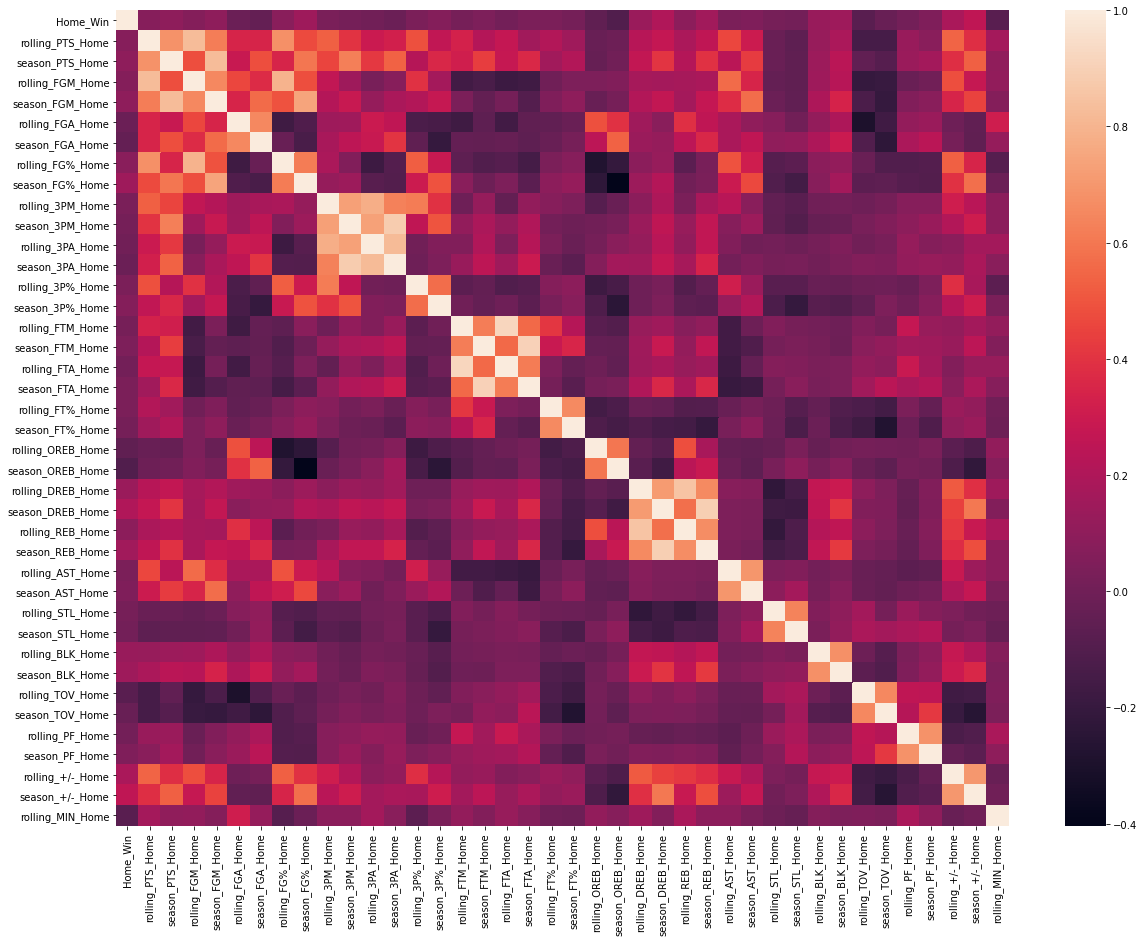

In [20]:
# Heatmap of the first 40 columns

plt.figure(figsize=(20,15))
sns.heatmap(New_df.iloc[:,0:40].corr())

In [21]:
# Home team win percentage
 
print('Home Team Won ' +  str(round(New_df['Home_Win'].sum()*100.0/ len(New_df),2)) + '% of the games.')

Home Team Won 55.03% of the games.


Home Team win 55.03% of the games, which is the rate we need to beat in my predictions.

<b><font size='5'>Model Building</font><b>

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance

In [23]:
# Score table for all classification models

class_index = ['LogisticRegression','LogisticRegression_I','LogisticRegression_II',
               'DecisionTreeClassifier',
               'RandomForestClassifier','RandomForestClassifier_I','RandomForestClassifier_II',
               'svc','svc_I', 'svc_II',
               'GradientBoostingClassifier','NaiveBayes']
score_df = pd.DataFrame(index = class_index, columns= ['accuracy_train','f1_score_train','accuracy_test','f1_score_test'])

# Calculate and print the result
def log_result(algo, pred_train, pred_test):    
    # compute the performance  
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    
    # log the performance
    score_df.loc[algo,:] = accuracy_train, f1_train, accuracy_test, f1_test
    
    # compute confusion matrix and print
    print("Classification results based on the testset:\n", classification_report(y_test, pred_test))

In [24]:
# Split into feautres and label to train model

X = New_df.drop(['Home_Win'], axis =1)
y = New_df['Home_Win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [25]:
# Logistic Regression

LR = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=10000))])
LR.fit(X_train, y_train)
log_result("LogisticRegression", LR.predict(X_train),LR.predict(X_test) )

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64        91
           1       0.72      0.71      0.72       118

    accuracy                           0.68       209
   macro avg       0.68      0.68      0.68       209
weighted avg       0.69      0.68      0.68       209



In [26]:
# Decision Tree

DT = DecisionTreeClassifier(class_weight = 'balanced', min_weight_fraction_leaf=0.01)
DT.fit(X_train, y_train)
log_result("DecisionTreeClassifier", DT.predict(X_train), DT.predict(X_test))

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50        91
           1       0.62      0.64      0.63       118

    accuracy                           0.57       209
   macro avg       0.57      0.57      0.57       209
weighted avg       0.57      0.57      0.57       209



In [27]:
# Random Forest

RF = Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier(class_weight='balanced'))])
RF.fit(X_train, y_train)
log_result("RandomForestClassifier", RF.predict(X_train), RF.predict(X_test))

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.64      0.52      0.57        91
           1       0.67      0.77      0.72       118

    accuracy                           0.66       209
   macro avg       0.65      0.64      0.64       209
weighted avg       0.66      0.66      0.65       209



In [28]:
# SVC

svc = Pipeline([('Scaler', StandardScaler()), ('svc', SVC())])
svc.fit(X_train, y_train)
log_result("svc", svc.predict(X_train), svc.predict(X_test))

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.67      0.54      0.60        91
           1       0.69      0.80      0.74       118

    accuracy                           0.68       209
   macro avg       0.68      0.67      0.67       209
weighted avg       0.68      0.68      0.68       209



In [29]:
# Gradient Boosting

GBC = Pipeline([('Scaler', StandardScaler()), ('GBC', GradientBoostingClassifier())])
GBC.fit(X_train, y_train)
log_result("GradientBoostingClassifier", GBC.predict(X_train), GBC.predict(X_test))

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.56      0.51      0.53        91
           1       0.65      0.69      0.67       118

    accuracy                           0.61       209
   macro avg       0.60      0.60      0.60       209
weighted avg       0.61      0.61      0.61       209



In [30]:
# Naive Bayes

NB = Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])
NB.fit(X_train, y_train)
log_result("NaiveBayes", NB.predict(X_train), NB.predict(X_test))

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.56      0.65      0.60        91
           1       0.69      0.60      0.64       118

    accuracy                           0.62       209
   macro avg       0.62      0.63      0.62       209
weighted avg       0.63      0.62      0.62       209



In [31]:
score_df.loc[['LogisticRegression', 'DecisionTreeClassifier','RandomForestClassifier',
              'svc', 'GradientBoostingClassifier','NaiveBayes'],:]

,accuracy_train,f1_score_train,accuracy_test,f1_score_test
LogisticRegression,0.715827,0.747604,0.684211,0.717949
DecisionTreeClassifier,0.839329,0.85177,0.574163,0.627615
RandomForestClassifier,1.0,1.0,0.660287,0.719368
svc,0.854916,0.871958,0.684211,0.740157
GradientBoostingClassifier,0.979616,0.981502,0.61244,0.669388
NaiveBayes,0.652278,0.671202,0.62201,0.642534


SVC, Random Forest, Logistic Regression seem to perform better.

<b><font size='5'>SVC</font><b>

In [32]:
# GridSerach to get the best params for SCV model

params = [{'svc__kernel': ['rbf','poly','sigmoid'], 
           'svc__gamma': [0.0001, 0.001, 0.01, 0.1],
           'svc__C':[0.1,1,10,100,1000],
           'svc__degree':[0,1,2,3]}]
svc_I = Pipeline([('Scaler', StandardScaler()), ('svc', SVC())])
svc_CV = GridSearchCV(svc_I, params, scoring = 'accuracy', cv=5, verbose = 1, n_jobs=-1)
svc_CV.fit(X_train, y_train)
print(svc_CV.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'svc__C': 1, 'svc__degree': 0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [33]:
# Update model with the best params

svc_I = Pipeline([('Scaler', StandardScaler()), ('svc', SVC(C= 1, degree= 0, gamma= 0.01, kernel= 'rbf'))])
svc_I.fit(X_train, y_train)
log_result("svc_I", svc_I.predict(X_train), svc_I.predict(X_test))

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.67      0.51      0.58        91
           1       0.68      0.81      0.74       118

    accuracy                           0.67       209
   macro avg       0.67      0.66      0.66       209
weighted avg       0.67      0.67      0.67       209



In [34]:
print(score_df.loc['svc_I'])

accuracy_train     0.91247
f1_score_train    0.922092
accuracy_test     0.674641
f1_score_test     0.736434
Name: svc_I, dtype: object


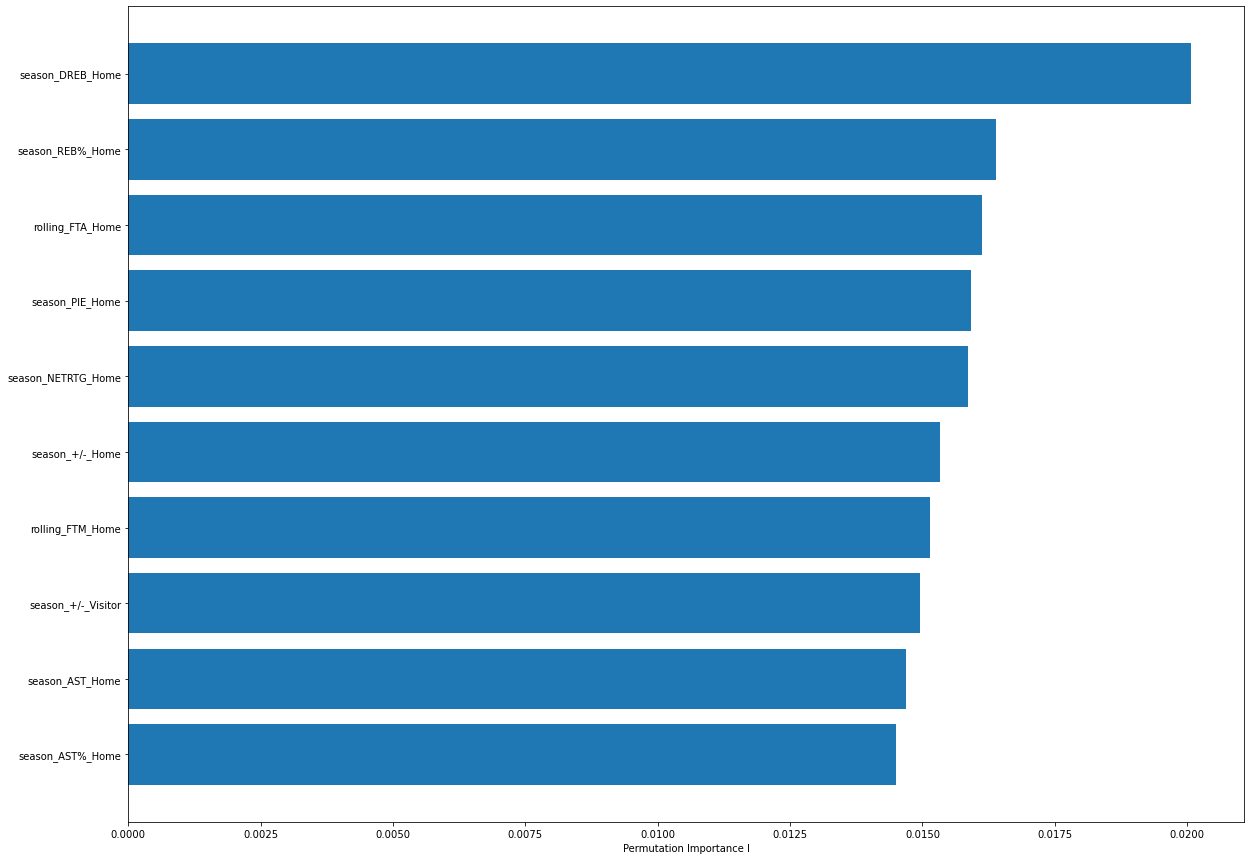

In [102]:
# Print top 10 features Using Permutation Importance

perm_importance = permutation_importance(svc_I, X_test, y_test, n_repeats=200, n_jobs=-1)#, random_state= 42)

feature_names = [feature for feature in X.columns]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(20,15))
plt.barh(features[sorted_idx][-10:], perm_importance.importances_mean[sorted_idx][-10:])
plt.xlabel("Permutation Importance I")
plt.rcParams.update({'font.size': 10}) 

In [103]:
SVC_features_I = pd.DataFrame({'features': features[sorted_idx][-10:], 
                          'permutation_importance': perm_importance.importances_mean[sorted_idx][-10:]}) \
                          .sort_values('permutation_importance', ascending = False)
SVC_features_I.reset_index(drop=True)

,features,permutation_importance
0,season_DREB_Home,0.020072
1,season_REB%_Home,0.016388
2,rolling_FTA_Home,0.016124
3,season_PIE_Home,0.015909
4,season_NETRTG_Home,0.015861
5,season_+/-_Home,0.015335
6,rolling_FTM_Home,0.015144
7,season_+/-_Visitor,0.014952
8,season_AST_Home,0.014689
9,season_AST%_Home,0.014498


In [72]:
# Now using the top 10 features to retrain the model

new_features = features[sorted_idx][-10:]
X_train_LR = X_train[new_features]
X_test_LR  = X_test[new_features]

params = [{'svc__kernel': ['rbf','poly','sigmoid'], 
           'svc__gamma': [0.0001, 0.001, 0.01, 0.1],
           'svc__C':[0.1,1,10,100,1000],
           'svc__degree':[0,1,2,3]}]
svc_II = Pipeline([('Scaler', StandardScaler()), ('svc', SVC())])
svc_CV_II = GridSearchCV(svc_II, params, scoring = 'accuracy', cv=5, verbose = 1, n_jobs=-1)
svc_CV_II.fit(X_train_LR, y_train)
print(svc_CV_II.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'svc__C': 1000, 'svc__degree': 0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [73]:
# Update model with the best params

svc_II = Pipeline([('Scaler', StandardScaler()), ('svc', SVC( C= 1000, degree= 0, gamma= 0.001, kernel= 'rbf'))])
svc_II.fit(X_train_LR, y_train)
log_result("svc_II", svc_II.predict(X_train_LR), svc_II.predict(X_test_LR))

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.60      0.52      0.56        91
           1       0.66      0.74      0.70       118

    accuracy                           0.64       209
   macro avg       0.63      0.63      0.63       209
weighted avg       0.64      0.64      0.64       209



In [74]:
print(score_df.loc['svc_II'])

accuracy_train    0.682254
f1_score_train    0.720759
accuracy_test     0.641148
f1_score_test     0.698795
Name: svc_II, dtype: object


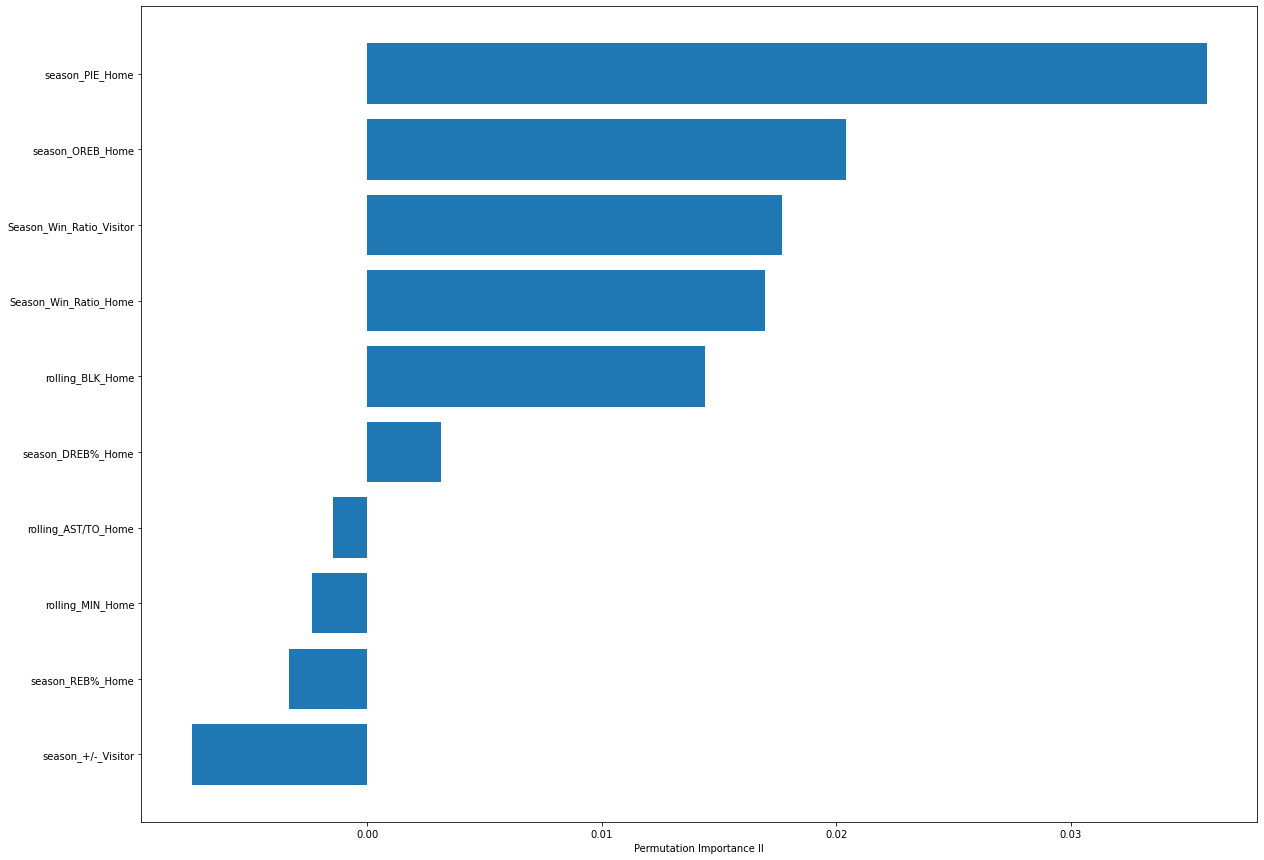

In [77]:
# Print top 10 features Using Permutation Importance

perm_importance = permutation_importance(svc_II, X_test_LR, y_test, n_repeats=200, n_jobs=-1)#, random_state= 42)

feature_names = new_features
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(20,15))
plt.barh(features[sorted_idx][-10:], perm_importance.importances_mean[sorted_idx][-10:])
plt.xlabel("Permutation Importance II")
plt.rcParams.update({'font.size': 10}) 

In [78]:
SVC_features_II = pd.DataFrame({'features': features[sorted_idx][-10:], 
                          'permutation_importance': perm_importance.importances_mean[sorted_idx][-10:]}) \
                          .sort_values('permutation_importance', ascending = False)
SVC_features_II.reset_index(drop=True)

,features,permutation_importance
0,season_PIE_Home,0.035789
1,season_OREB_Home,0.020431
2,Season_Win_Ratio_Visitor,0.017679
3,Season_Win_Ratio_Home,0.016962
4,rolling_BLK_Home,0.014426
5,season_DREB%_Home,0.003134
6,rolling_AST/TO_Home,-0.001435
7,rolling_MIN_Home,-0.002344
8,season_REB%_Home,-0.003349
9,season_+/-_Visitor,-0.007464


<b><font size='5'>Random Forest</font><b>

In [81]:
# GridSerach to get the best params for Random Forest model

params = {'RF__n_estimators': [100, 300, 1000],
               'RF__max_features': ['auto', 'sqrt'],
               'RF__max_depth': [10, 40, 70, 100],
               'RF__min_samples_split': [2, 5, 10],
               'RF__min_samples_leaf': [6, 8, 10, 12],
               'RF__bootstrap': [True]}
RF_I = Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier(class_weight='balanced'))])
RF_CV = GridSearchCV(RF_I, params, scoring = 'accuracy', cv=5, verbose =1, n_jobs=-1)
RF_CV.fit(X_train, y_train)
print(RF_CV.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'RF__bootstrap': True, 'RF__max_depth': 10, 'RF__max_features': 'auto', 'RF__min_samples_leaf': 6, 'RF__min_samples_split': 10, 'RF__n_estimators': 300}


In [85]:
# Update model with the best params

RF_I = Pipeline([('Scaler', StandardScaler()), 
               ('RF', RandomForestClassifier(bootstrap= 'True', max_depth=10, max_features= 'auto', min_samples_leaf=6,
                                             min_samples_split=10, n_estimators= 300, class_weight='balanced'))])
RF_I.fit(X_train, y_train)
log_result("RandomForestClassifier_I", RF_I.predict(X_train), RF_I.predict(X_test))

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.61      0.54      0.57        91
           1       0.67      0.74      0.70       118

    accuracy                           0.65       209
   macro avg       0.64      0.64      0.64       209
weighted avg       0.65      0.65      0.65       209



In [86]:
print(score_df.loc['RandomForestClassifier_I'])

accuracy_train    0.968825
f1_score_train    0.971429
accuracy_test     0.650718
f1_score_test     0.704453
Name: RandomForestClassifier_I, dtype: object


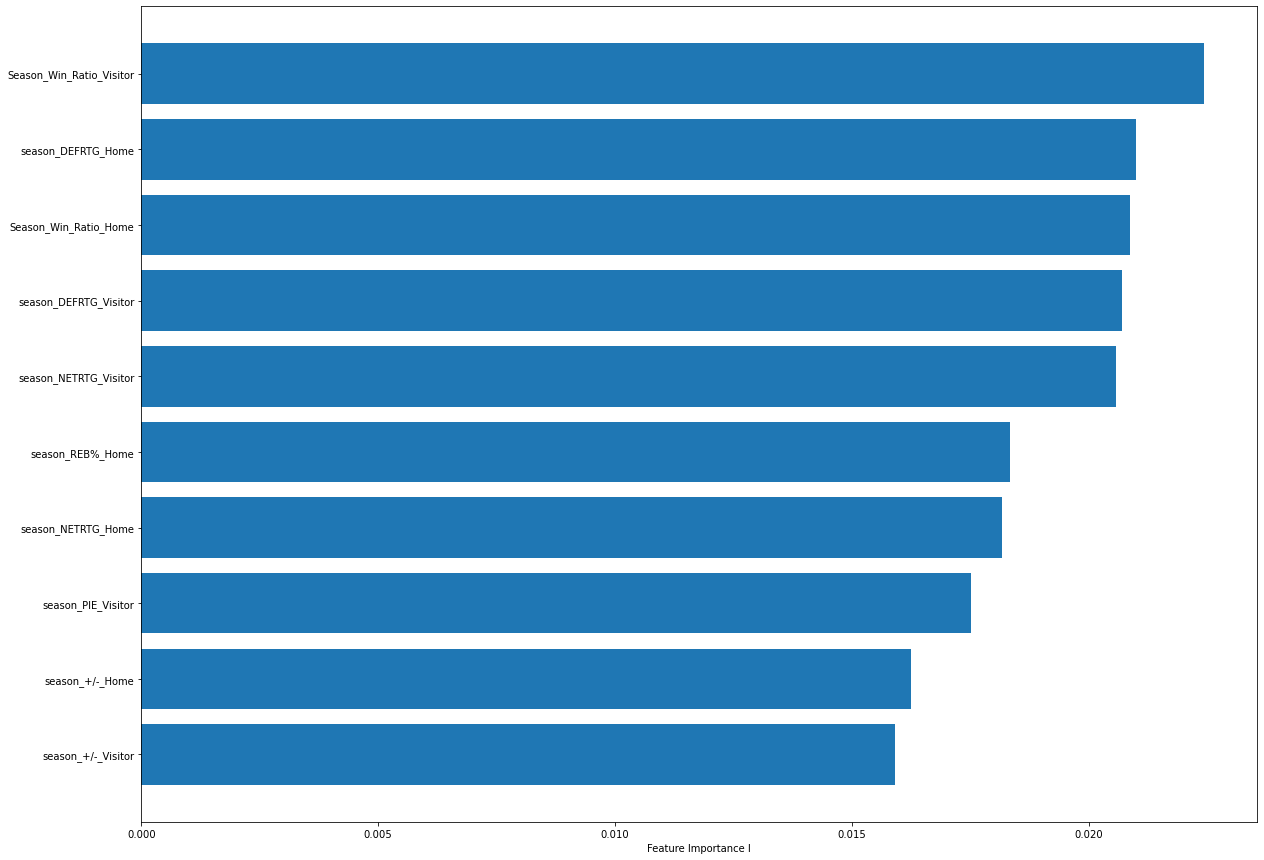

In [87]:
# Print top 10 features Using feature_importances_

Variables = pd.DataFrame({'feature': X_train.columns, 'weight':RF_I.named_steps.RF.feature_importances_})
Variables = Variables.sort_values(by='weight', ascending = False)[:10].reset_index(drop=True)

plt.figure(figsize=(20,15))
plt.barh(Variables.feature, Variables.weight)
plt.xlabel("Feature Importance I")
plt.gca().invert_yaxis()
plt.rcParams.update({'font.size': 10}) 

In [88]:
Variables

,feature,weight
0,Season_Win_Ratio_Visitor,0.022436
1,season_DEFRTG_Home,0.020986
2,Season_Win_Ratio_Home,0.020863
3,season_DEFRTG_Visitor,0.020695
4,season_NETRTG_Visitor,0.020575
5,season_REB%_Home,0.018344
6,season_NETRTG_Home,0.018166
7,season_PIE_Visitor,0.017519
8,season_+/-_Home,0.016237
9,season_+/-_Visitor,0.015911


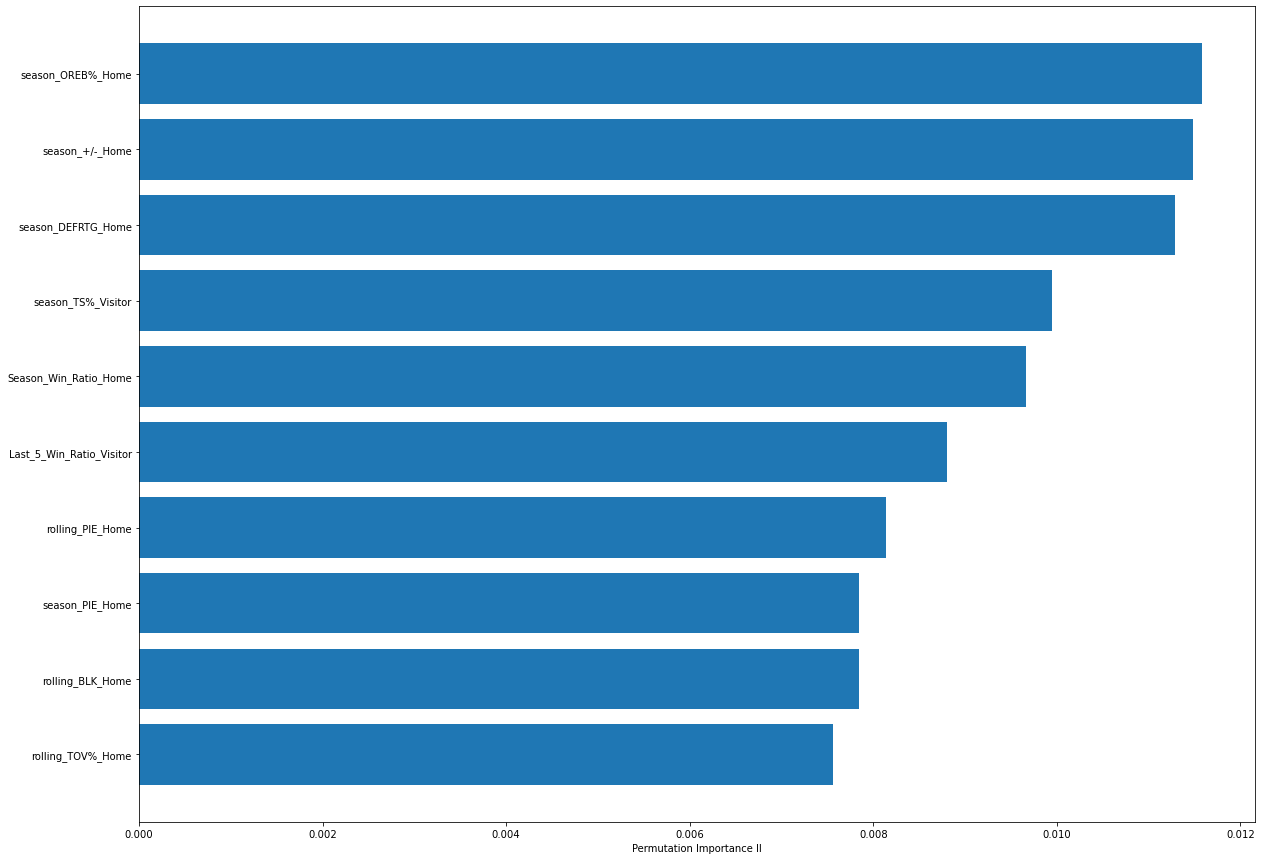

In [100]:
# Print top 10 features Using Permutation Importance

perm_importance = permutation_importance(RF_I, X_test, y_test, n_repeats=50, random_state= 42,n_jobs=-1)

feature_names = [feature for feature in X.columns]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(20,15))
plt.barh(features[sorted_idx][-10:], perm_importance.importances_mean[sorted_idx][-10:])
plt.xlabel("Permutation Importance II")
plt.rcParams.update({'font.size': 10}) 

In [101]:
RF_features_I = pd.DataFrame({'features': features[sorted_idx][-10:], 
                          'permutation_importance': perm_importance.importances_mean[sorted_idx][-10:]}) \
                          .sort_values('permutation_importance', ascending = False)
RF_features_I.reset_index(drop=True)

,features,permutation_importance
0,season_OREB%_Home,0.011579
1,season_+/-_Home,0.011483
2,season_DEFRTG_Home,0.011292
3,season_TS%_Visitor,0.009952
4,Season_Win_Ratio_Home,0.009665
5,Last_5_Win_Ratio_Visitor,0.008804
6,rolling_PIE_Home,0.008134
7,season_PIE_Home,0.007847
8,rolling_BLK_Home,0.007847
9,rolling_TOV%_Home,0.007560


In [91]:
# Now using the top 10 features to retrain the model

new_features = features[sorted_idx][-10:]
X_train_RF = X_train[new_features]
X_test_RF  = X_test[new_features]

params = {'RF__n_estimators': [100, 300, 1000],
               'RF__max_features': ['auto', 'sqrt'],
               'RF__max_depth': [10, 40, 70, 100],
               'RF__min_samples_split': [2, 5, 10],
               'RF__min_samples_leaf': [6, 8, 10, 12],
               'RF__bootstrap': [True]}
RF_II = Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier(class_weight='balanced'))])
RF_CV_II = GridSearchCV(RF_II, params, scoring = 'accuracy', cv=5, verbose =1, n_jobs=-1)
RF_CV_II.fit(X_train_RF, y_train)
print(RF_CV_II.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'RF__bootstrap': True, 'RF__max_depth': 40, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 12, 'RF__min_samples_split': 10, 'RF__n_estimators': 100}


In [92]:
# Update model with the best params

RF_II = Pipeline([('Scaler', StandardScaler()), 
               ('RF', RandomForestClassifier(bootstrap= 'True', max_depth= 40, max_features= 'sqrt', min_samples_leaf= 12,
                                             min_samples_split= 10, n_estimators= 100, class_weight= 'balanced'))])
RF_II.fit(X_train_RF, y_train)
log_result("RandomForestClassifier_II", RF_II.predict(X_train_RF), RF_II.predict(X_test_RF))

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65        91
           1       0.73      0.69      0.71       118

    accuracy                           0.68       209
   macro avg       0.68      0.68      0.68       209
weighted avg       0.69      0.68      0.69       209



In [93]:
print(score_df.loc['RandomForestClassifier_II'])

accuracy_train    0.778177
f1_score_train     0.79096
accuracy_test     0.684211
f1_score_test     0.713043
Name: RandomForestClassifier_II, dtype: object


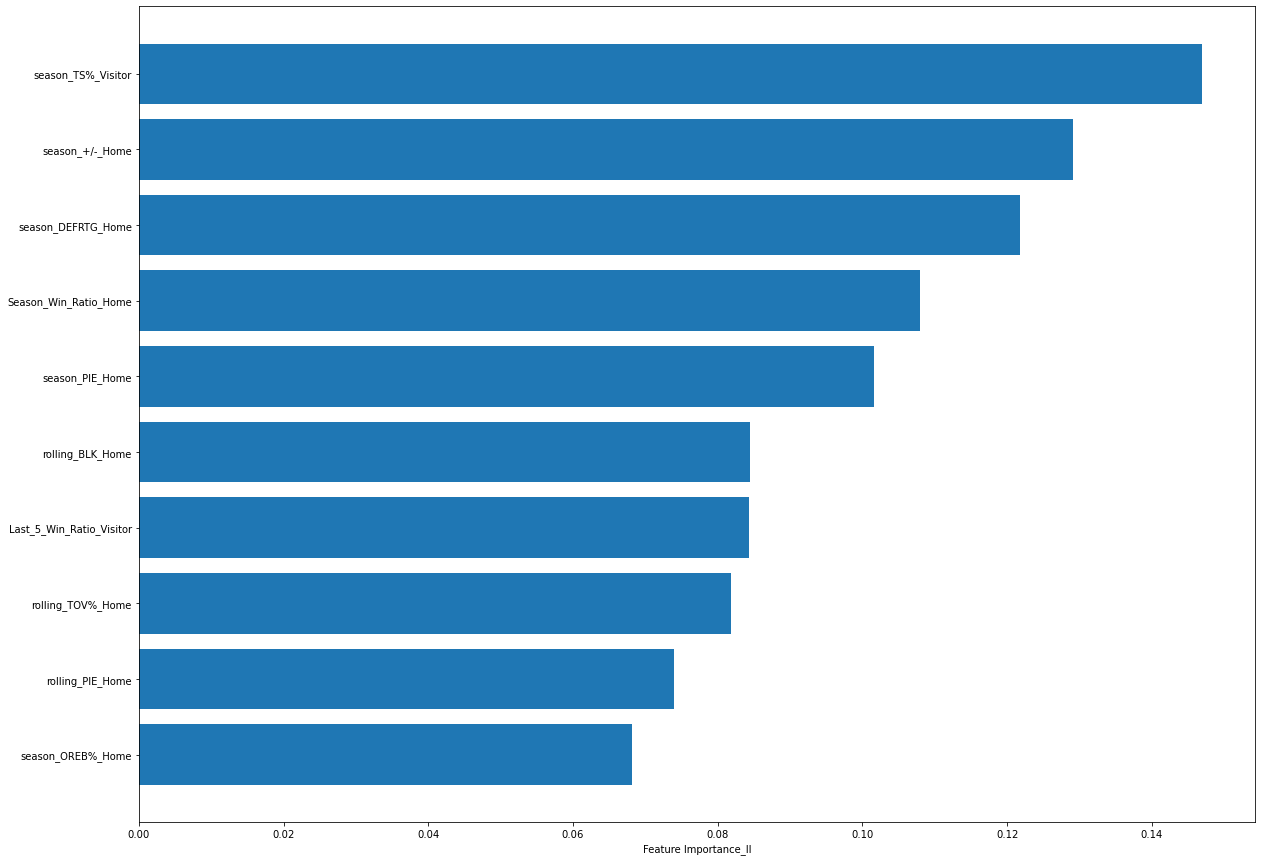

In [94]:
# Print top 10 features Using feature_importances_

Variables = pd.DataFrame({'feature': X_train_RF.columns, 'weight':RF_II.named_steps.RF.feature_importances_})
Variables = Variables.sort_values(by='weight', ascending = False)[:10].reset_index(drop=True)

plt.figure(figsize=(20,15))
plt.barh(Variables.feature, Variables.weight)
plt.xlabel("Feature Importance_II")
plt.gca().invert_yaxis()
plt.rcParams.update({'font.size': 10}) 

In [95]:
Variables

,feature,weight
0,season_TS%_Visitor,0.146910
1,season_+/-_Home,0.129113
2,season_DEFRTG_Home,0.121735
3,Season_Win_Ratio_Home,0.107993
4,season_PIE_Home,0.101544
5,rolling_BLK_Home,0.084443
6,Last_5_Win_Ratio_Visitor,0.084360
7,rolling_TOV%_Home,0.081901
8,rolling_PIE_Home,0.073919
9,season_OREB%_Home,0.068082


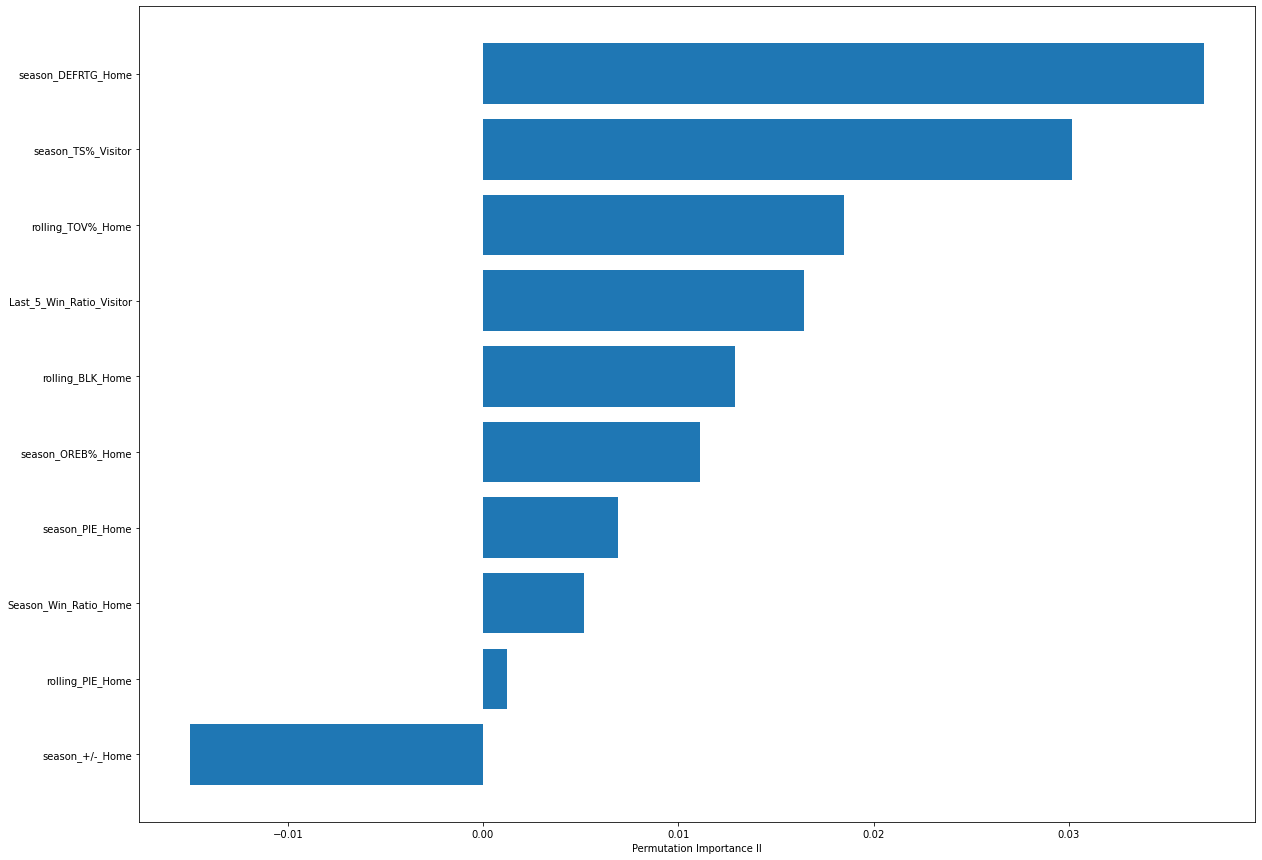

In [98]:
# Print top 10 features Using Permutation Importance

perm_importance = permutation_importance(RF_II, X_test_RF, y_test, n_repeats=50, random_state= 42,n_jobs=-1)

feature_names = new_features
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(20,15))
plt.barh(features[sorted_idx][-10:], perm_importance.importances_mean[sorted_idx][-10:])
plt.xlabel("Permutation Importance II")
plt.rcParams.update({'font.size': 10}) 

In [99]:
RF_features_II = pd.DataFrame({'features': features[sorted_idx][-10:], 
                          'permutation_importance': perm_importance.importances_mean[sorted_idx][-10:]}) \
                          .sort_values('permutation_importance', ascending = False)
RF_features_II.reset_index(drop=True)

,features,permutation_importance
0,season_DEFRTG_Home,0.036938
1,season_TS%_Visitor,0.030144
2,rolling_TOV%_Home,0.018469
3,Last_5_Win_Ratio_Visitor,0.016459
4,rolling_BLK_Home,0.012919
5,season_OREB%_Home,0.011100
6,season_PIE_Home,0.006890
7,Season_Win_Ratio_Home,0.005167
8,rolling_PIE_Home,0.001244
9,season_+/-_Home,-0.015024


<b><font size='5'>Logistic Regression</font><b>

In [104]:
# GridSerach to get the best params for Random Forest model

params = {'LR__penalty' : ['l1','l2'],
          'LR__C' : [100, 10, 1.0, 0.1, 0.01],
          'LR__max_iter' : [100,150,200,300],
          'LR__solver':['liblinear','saga']
         }
LR_I = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=10000))])

LR_CV = GridSearchCV(LR_I, params, scoring = 'accuracy', cv=5, verbose =1, n_jobs=-1)
LR_CV.fit(X_train, y_train)
print(LR_CV.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'LR__C': 0.1, 'LR__max_iter': 150, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}


In [105]:
LR_I = Pipeline([('Scaler', StandardScaler()), 
               ('LR', LogisticRegression(C=0.1,  max_iter= 150, penalty='l1', solver = 'liblinear'))])
LR_I.fit(X_train, y_train)
log_result("LogisticRegression_I", LR_I.predict(X_train), LR_I.predict(X_test))

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.63      0.57      0.60        91
           1       0.69      0.74      0.71       118

    accuracy                           0.67       209
   macro avg       0.66      0.65      0.66       209
weighted avg       0.66      0.67      0.66       209



In [106]:
print(score_df.loc['LogisticRegression_I'])

accuracy_train    0.678657
f1_score_train    0.711828
accuracy_test     0.665072
f1_score_test     0.713115
Name: LogisticRegression_I, dtype: object


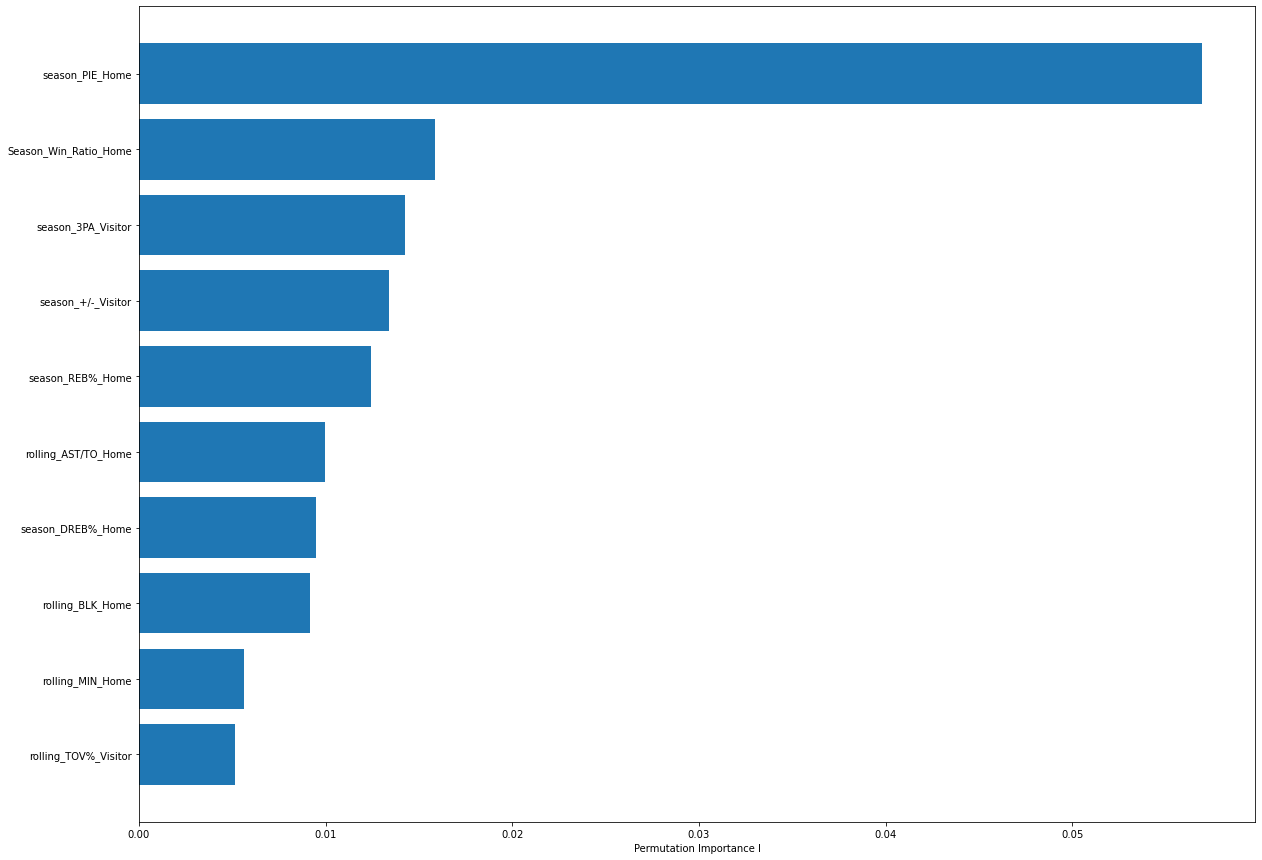

In [108]:
# Print top 10 features Using Permutation Importance

perm_importance = permutation_importance(LR_I, X_test, y_test, n_repeats=50, random_state= 42, n_jobs=-1)

feature_names = [feature for feature in X.columns]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(20,15))
plt.barh(features[sorted_idx][-10:], perm_importance.importances_mean[sorted_idx][-10:])
plt.xlabel("Permutation Importance I")
plt.rcParams.update({'font.size': 10}) 

In [109]:
LR_features_I = pd.DataFrame({'features': features[sorted_idx][-10:], 
                          'permutation_importance': perm_importance.importances_mean[sorted_idx][-10:]}) \
                          .sort_values('permutation_importance', ascending = False)
LR_features_I.reset_index(drop=True)                                                                                                                    

,features,permutation_importance
0,season_PIE_Home,0.056938
1,Season_Win_Ratio_Home,0.015885
2,season_3PA_Visitor,0.014258
3,season_+/-_Visitor,0.013397
4,season_REB%_Home,0.012440
5,rolling_AST/TO_Home,0.009952
6,season_DREB%_Home,0.009474
7,rolling_BLK_Home,0.009187
8,rolling_MIN_Home,0.005646
9,rolling_TOV%_Visitor,0.005167


In [110]:
# Now using the top 10 features to retrain the model

new_features = features[sorted_idx][-10:]
X_train_LR = X_train[new_features]
X_test_LR  = X_test[new_features]

params = {'LR__penalty' : ['l1','l2'],
          'LR__C' : [100, 10, 1.0, 0.1, 0.01],
          'LR__max_iter' : [100,150,200,300],
          'LR__solver':['liblinear','saga']
         }
LR_II = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=10000))])
LR_CV_II = GridSearchCV(LR_II, params, scoring = 'accuracy', cv=5, verbose =1, n_jobs=-1)
LR_CV_II.fit(X_train_LR, y_train)
print(LR_CV_II.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'LR__C': 100, 'LR__max_iter': 100, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}


In [111]:
LR_II = Pipeline([('Scaler', StandardScaler()), 
               ('LR', LogisticRegression(C=100,  max_iter= 100, penalty='l1', solver = 'liblinear'))])
LR_II.fit(X_train_LR, y_train)
log_result("LogisticRegression_II", LR_II.predict(X_train_LR), LR_II.predict(X_test_LR))

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.63      0.49      0.56        91
           1       0.67      0.78      0.72       118

    accuracy                           0.66       209
   macro avg       0.65      0.64      0.64       209
weighted avg       0.65      0.66      0.65       209



In [112]:
print(score_df.loc['LogisticRegression_II'])

accuracy_train    0.659472
f1_score_train    0.702306
accuracy_test     0.655502
f1_score_test      0.71875
Name: LogisticRegression_II, dtype: object


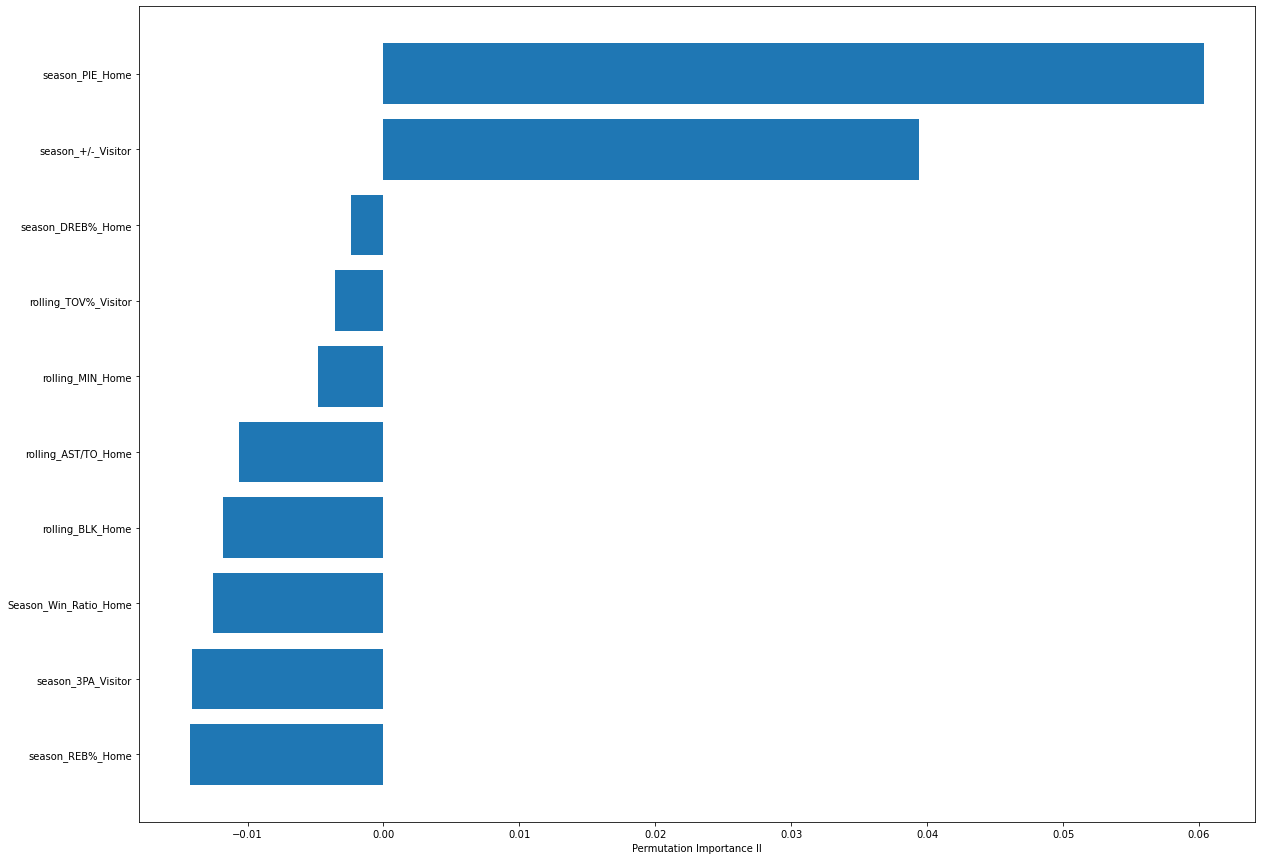

In [113]:
# Print top 10 features Using Permutation Importance

perm_importance = permutation_importance(LR_II, X_test_LR, y_test, n_repeats=50, n_jobs=-1, random_state=42)

feature_names = new_features
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(20,15))
plt.barh(features[sorted_idx][-10:], perm_importance.importances_mean[sorted_idx][-10:])
plt.xlabel("Permutation Importance II")
plt.rcParams.update({'font.size': 10}) 

In [114]:
LR_features_II = pd.DataFrame({'features': features[sorted_idx][-10:], 
                          'permutation_importance': perm_importance.importances_mean[sorted_idx][-10:]}) \
                          .sort_values('permutation_importance', ascending = False)
print('LR_features_II: top 10 features')
LR_features_II.reset_index(drop=True)

LR_features_II: top 10 features


,features,permutation_importance
0,season_PIE_Home,0.060383
1,season_+/-_Visitor,0.039426
2,season_DREB%_Home,-0.002392
3,rolling_TOV%_Visitor,-0.003541
4,rolling_MIN_Home,-0.004785
5,rolling_AST/TO_Home,-0.010622
6,rolling_BLK_Home,-0.011770
7,Season_Win_Ratio_Home,-0.012536
8,season_3PA_Visitor,-0.014067
9,season_REB%_Home,-0.014258


<b><font size='5'>Summary</font><b>

I tried 3 different models that perform better and tuned the hypaparameter. The result is as the following:

In [115]:
score_df

,accuracy_train,f1_score_train,accuracy_test,f1_score_test
LogisticRegression,0.715827,0.747604,0.684211,0.717949
LogisticRegression_I,0.678657,0.711828,0.665072,0.713115
LogisticRegression_II,0.659472,0.702306,0.655502,0.71875
DecisionTreeClassifier,0.839329,0.85177,0.574163,0.627615
RandomForestClassifier,1.0,1.0,0.660287,0.719368
RandomForestClassifier_I,0.968825,0.971429,0.650718,0.704453
RandomForestClassifier_II,0.778177,0.79096,0.684211,0.713043
svc,0.854916,0.871958,0.684211,0.740157
svc_I,0.91247,0.922092,0.674641,0.736434
svc_II,0.682254,0.720759,0.641148,0.698795


In [116]:
score_df.loc[['svc','RandomForestClassifier','LogisticRegression']]

,accuracy_train,f1_score_train,accuracy_test,f1_score_test
svc,0.854916,0.871958,0.684211,0.740157
RandomForestClassifier,1.0,1.0,0.660287,0.719368
LogisticRegression,0.715827,0.747604,0.684211,0.717949


Either model showed a great improvement from the baseline, home team win rate at 55.03%.

It seems like SVC was the best model. As for the feature importance, using permutation importance, "season_PIE_Home" was the most important feature in random forsest and logistic regression models. But it was only the 9th important feature in SVC model, even though the value was not significantly lower than the 1st.

Let's take a look at the feature "season_pie_home." It's the average PIE value of all the games had played in the season. Quoting from www.nba.com, <b>"PIE is a simple metric that gives an excellent indication of performance at both the team and player level. It’s a major improvement to our EFF Rating. Notably 2 things changed: (1) We included Personal Fouls, (2) We added a denominator. We feel the key here is the denominator because it acts as an "automatic equalizer". Using the denominator, we find there is no need to consider the "PACE" of the statistics that are being analyzed. In its simplest terms, PIE shows what % of game events did that player or team achieve. The stats being analyzed are your traditional basketball statistics (PTS, REB, AST, TOV, etc..) A team that achieves more than 50% is likely to be a winning team. A player that achieves more than 10% is likely to be better than the average player. A high PIE % is highly correlated to winning. In fact, a team’s PIE rating and a team’s winning percentage correlate at an R square of .908 which indicates a "strong" correlation. We’ve introduced this statistic because we feel it incorporates a bit of defense into the equation. When a team misses a shot, all 5 players on the other team’s PIE rating goes up."<b>

The following is the formula of PIE:

     (PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO) / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)

It's a statistic that NBA came up to replace the EFF rating they used. Interestingly, only the PIE stat of the home team mattered but not the PIE stat of the visitor team. I would expect that the opponenet's strength plays an important role to predict the winner.